# Zadanie 1/2

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib

from categorizer import Normalizer
from categorizer import Analyzer
from categorizer import Vectorizer

#Import json data into DF
#dataset: https://www.kaggle.com/rmisra/news-category-dataset
src = 'News_Category_Dataset_v2.json'
normalizer = Normalizer(src,2000)



normalizer.load_file_json()



normalizer.data.head(100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,headline,authors,link,short_description,date
0,GOOD NEWS,Do You Have a Green Thumb With People?,"Peg Melnik, ContributorJournalist",https://www.huffingtonpost.com/entry/do-you-ha...,I once read that we should all tend to the peo...,2014-06-22
1,WELLNESS,30 Celebrities Yawning (PHOTOS),,https://www.huffingtonpost.com/entry/sleep-cel...,"In general, researchers tend to fall into one ...",2012-05-17
2,WELLNESS,Cultivating Equanimity Through Adversity: What...,"Lauren Cahn, Contributor\nSmall girl, LARGE op...",https://www.huffingtonpost.com/entry/handling-...,I didn't choose to cultivate equanimity. It c...,2013-03-23
3,POLITICS,The Problem With Paternalizing Disabled People...,"Kim Sauder, ContributorPhD student",https://www.huffingtonpost.com/entry/the-probl...,"More than a week after the 2016 U.S. election,...",2016-11-27
4,POLITICS,A Lesson In Civility For Senator Jeff Sessions,"Wendi Nunnery, ContributorWriter. Wife. Wanderer.",https://www.huffingtonpost.com/entry/a-lesson-...,Donald Trump and Sen. Sessions have both made ...,2016-11-29
...,...,...,...,...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' And 'Picket Fen...",Julia Brucculieri,https://www.huffingtonpost.com/entry/fyvush-fi...,The actor died on Sunday in Manhattan.,2016-08-15
96,TASTE,The Super Simple Trick To Poaching A Lot Of Eg...,Julie R. Thomson,https://www.huffingtonpost.com/entry/poached-e...,You don't even need to bring a pot of water to...,2017-02-08
97,STYLE,Olivia Palermo Proves You Don't Have To Dress ...,Michelle Persad,https://www.huffingtonpost.com/entry/olivia-pa...,This lady does it again.,2016-01-28
98,PARENTING,No Longer a Mom to Single-Digits: Parenting Tw...,"Rachel Blaufeld, Contributor\nBestselling Roma...",https://www.huffingtonpost.com/entry/no-longer...,I was excited to watch my big guy hit these ma...,2013-05-23


In [2]:
normalizer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           2000 non-null   object
 1   headline           2000 non-null   object
 2   authors            2000 non-null   object
 3   link               2000 non-null   object
 4   short_description  2000 non-null   object
 5   date               2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB
None


In [3]:
normalizer.concat_cols('text',['headline','short_description'])

normalizer.data.head(100)





,category,headline,authors,link,short_description,date,text
0,GOOD NEWS,Do You Have a Green Thumb With People?,"Peg Melnik, ContributorJournalist",https://www.huffingtonpost.com/entry/do-you-ha...,I once read that we should all tend to the peo...,2014-06-22,Do You Have a Green Thumb With People? I once ...
1,WELLNESS,30 Celebrities Yawning (PHOTOS),,https://www.huffingtonpost.com/entry/sleep-cel...,"In general, researchers tend to fall into one ...",2012-05-17,"30 Celebrities Yawning (PHOTOS) In general, re..."
2,WELLNESS,Cultivating Equanimity Through Adversity: What...,"Lauren Cahn, Contributor\nSmall girl, LARGE op...",https://www.huffingtonpost.com/entry/handling-...,I didn't choose to cultivate equanimity. It c...,2013-03-23,Cultivating Equanimity Through Adversity: What...
3,POLITICS,The Problem With Paternalizing Disabled People...,"Kim Sauder, ContributorPhD student",https://www.huffingtonpost.com/entry/the-probl...,"More than a week after the 2016 U.S. election,...",2016-11-27,The Problem With Paternalizing Disabled People...
4,POLITICS,A Lesson In Civility For Senator Jeff Sessions,"Wendi Nunnery, ContributorWriter. Wife. Wanderer.",https://www.huffingtonpost.com/entry/a-lesson-...,Donald Trump and Sen. Sessions have both made ...,2016-11-29,A Lesson In Civility For Senator Jeff Sessions...
...,...,...,...,...,...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' And 'Picket Fen...",Julia Brucculieri,https://www.huffingtonpost.com/entry/fyvush-fi...,The actor died on Sunday in Manhattan.,2016-08-15,"Fyvush Finkel, 'Boston Public' And 'Picket Fen..."
96,TASTE,The Super Simple Trick To Poaching A Lot Of Eg...,Julie R. Thomson,https://www.huffingtonpost.com/entry/poached-e...,You don't even need to bring a pot of water to...,2017-02-08,The Super Simple Trick To Poaching A Lot Of Eg...
97,STYLE,Olivia Palermo Proves You Don't Have To Dress ...,Michelle Persad,https://www.huffingtonpost.com/entry/olivia-pa...,This lady does it again.,2016-01-28,Olivia Palermo Proves You Don't Have To Dress ...
98,PARENTING,No Longer a Mom to Single-Digits: Parenting Tw...,"Rachel Blaufeld, Contributor\nBestselling Roma...",https://www.huffingtonpost.com/entry/no-longer...,I was excited to watch my big guy hit these ma...,2013-05-23,No Longer a Mom to Single-Digits: Parenting Tw...


In [4]:
normalizer.drop_cols(['date', 'link', 'short_description', 'headline', 'authors'])
normalizer.data.head(100)

,category,text
0,GOOD NEWS,Do You Have a Green Thumb With People? I once ...
1,WELLNESS,"30 Celebrities Yawning (PHOTOS) In general, re..."
2,WELLNESS,Cultivating Equanimity Through Adversity: What...
3,POLITICS,The Problem With Paternalizing Disabled People...
4,POLITICS,A Lesson In Civility For Senator Jeff Sessions...
...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' And 'Picket Fen..."
96,TASTE,The Super Simple Trick To Poaching A Lot Of Eg...
97,STYLE,Olivia Palermo Proves You Don't Have To Dress ...
98,PARENTING,No Longer a Mom to Single-Digits: Parenting Tw...


In [5]:
normalizer.drop_stopwords(['text'])

normalizer.data.head(100)






,category,text
0,GOOD NEWS,Green Thumb People? read tend people world tho...
1,WELLNESS,"30 Celebrities Yawning (PHOTOS) general, resea..."
2,WELLNESS,Cultivating Equanimity Adversity: Wish Could T...
3,POLITICS,Problem Paternalizing Disabled People Protest ...
4,POLITICS,Lesson Civility Senator Jeff Sessions Donald T...
...,...,...
95,ENTERTAINMENT,"Fyvush Finkel, 'Boston Public' 'Picket Fences'..."
96,TASTE,Super Simple Trick Poaching Lot Eggs even need...
97,STYLE,Olivia Palermo Proves Dress Sexy Stylish lady ...
98,PARENTING,Longer Mom Single-Digits: Parenting Two Pretee...


In [6]:
normalizer.to_lower(['text'])
normalizer.data.head(100)

,category,text
0,GOOD NEWS,green thumb people? read tend people world tho...
1,WELLNESS,"30 celebrities yawning (photos) general, resea..."
2,WELLNESS,cultivating equanimity adversity: wish could t...
3,POLITICS,problem paternalizing disabled people protest ...
4,POLITICS,lesson civility senator jeff sessions donald t...
...,...,...
95,ENTERTAINMENT,"fyvush finkel, 'boston public' 'picket fences'..."
96,TASTE,super simple trick poaching lot eggs even need...
97,STYLE,olivia palermo proves dress sexy stylish lady ...
98,PARENTING,longer mom single-digits: parenting two pretee...


In [7]:
normalizer.drop_num(['text'])
normalizer.data.head(100)

,category,text
0,GOOD NEWS,green thumb people? read tend people world tho...
1,WELLNESS,"celebrities yawning (photos) general, research..."
2,WELLNESS,cultivating equanimity adversity: wish could t...
3,POLITICS,problem paternalizing disabled people protest ...
4,POLITICS,lesson civility senator jeff sessions donald t...
...,...,...
95,ENTERTAINMENT,"fyvush finkel, 'boston public' 'picket fences'..."
96,TASTE,super simple trick poaching lot eggs even need...
97,STYLE,olivia palermo proves dress sexy stylish lady ...
98,PARENTING,longer mom single-digits: parenting two pretee...


In [8]:
normalizer.drop_spec(['text'])
normalizer.data.head(100)

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\normalizer.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
  self.data[c] = self.data[c].str.replace('[^\w\s]', '')


,category,text
0,GOOD NEWS,green thumb people read tend people world thou...
1,WELLNESS,celebrities yawning photos general researchers...
2,WELLNESS,cultivating equanimity adversity wish could te...
3,POLITICS,problem paternalizing disabled people protest ...
4,POLITICS,lesson civility senator jeff sessions donald t...
...,...,...
95,ENTERTAINMENT,fyvush finkel boston public picket fences acto...
96,TASTE,super simple trick poaching lot eggs even need...
97,STYLE,olivia palermo proves dress sexy stylish lady ...
98,PARENTING,longer mom singledigits parenting two preteens...


In [9]:
normalizer.drop_rarest(3)
normalizer.data.head(100)

,category,text
0,GOOD NEWS,green people read tend people world though pla...
1,WELLNESS,celebrities photos general researchers tend fa...
2,WELLNESS,adversity wish could teach family choose me ex...
3,POLITICS,problem disabled people protest donald trump w...
4,POLITICS,senator jeff sessions donald trump sen session...
...,...,...
95,ENTERTAINMENT,boston public actor dead actor died sunday man...
96,TASTE,super simple trick lot eggs even need bring po...
97,STYLE,proves dress sexy stylish lady again
98,PARENTING,longer mom parenting two excited watch big guy...


In [10]:
normalizer.lemmatize()
#normalizer.data.head(100)

In [11]:
analyzer = Analyzer(normalizer.data.copy())
normalizer.drop_cols(['category'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\przek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


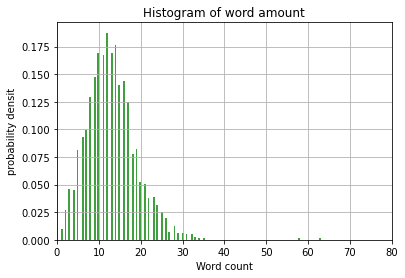

In [12]:
analyzer.word_count('text', 80)

In [13]:
analyzer.data.head(50)

,category,text,word_count
0,GOOD NEWS,green people read tend people world though pla...,18
1,WELLNESS,celebrity photo general researcher tend fall o...,11
2,WELLNESS,adversity wish could teach family choose me ex...,23
3,POLITICS,problem disabled people protest donald trump w...,18
4,POLITICS,senator jeff session donald trump sen session ...,10
5,SCIENCE,leader top company call ban killer others open...,11
6,DIVORCE,year get it cant seem able move forward stop m...,15
7,BUSINESS,world bank role bloody land war,6
8,POLITICS,latest show broad opposition gop obamacare nea...,20
9,STYLE & BEAUTY,fabulous engagement ring ring case point setti...,17


In [14]:
category_list_count = [0]*len(set(analyzer.data['category']))
words = {'Category':analyzer.data['category'].unique(), 'Word_count':category_list_count, 'Amount_of_cat':category_list_count}
unique_category = pd.DataFrame(words)
unique_category.index = analyzer.data['category'].unique()
unique_category

,Category,Word_count,Amount_of_cat
GOOD NEWS,GOOD NEWS,0,0
WELLNESS,WELLNESS,0,0
POLITICS,POLITICS,0,0
SCIENCE,SCIENCE,0,0
DIVORCE,DIVORCE,0,0
BUSINESS,BUSINESS,0,0
STYLE & BEAUTY,STYLE & BEAUTY,0,0
TRAVEL,TRAVEL,0,0
SPORTS,SPORTS,0,0
PARENTING,PARENTING,0,0


c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Word_count'][a] = unique_category['Word_count'][a] + self.data['word_count'][index]
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

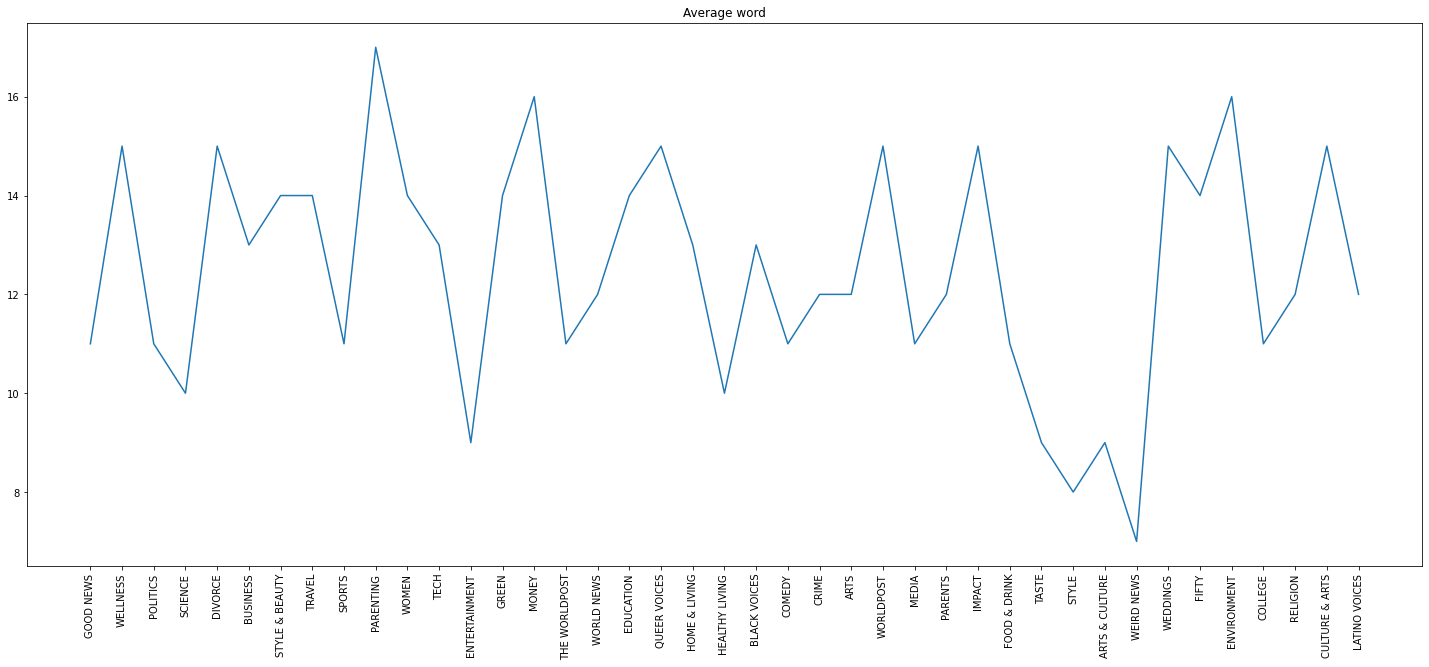

In [15]:
analyzer.word_avg()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Unique_words'][a] = unique_category['Unique_words'][a] + len(unique_text_words)
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1
c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

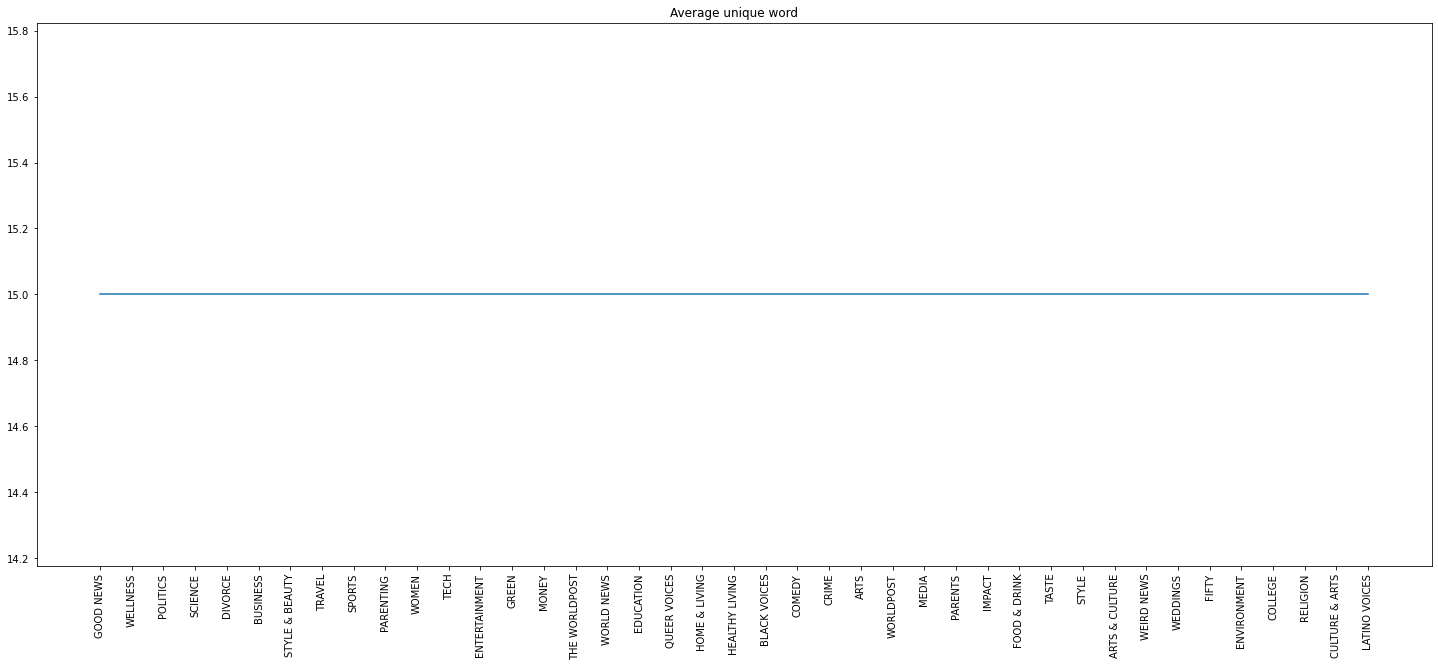

In [16]:

analyzer.word_unique()

c:\Users\przek\source\repos\uczelnia\news_category_predictor\categorizer\analyzer.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_category['Amount_of_cat'][a] = unique_category['Amount_of_cat'][a]+1


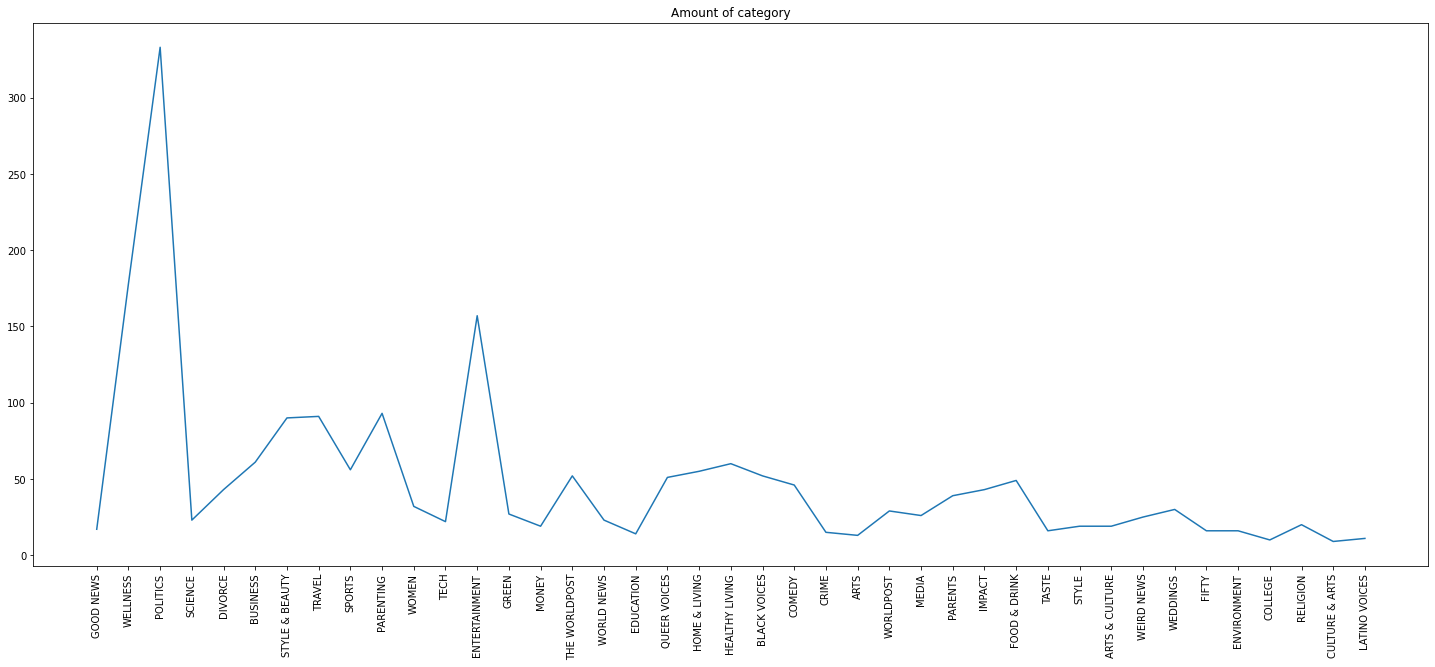

In [17]:
analyzer.amount_of_cat()

In [18]:
vectorizer = Vectorizer(normalizer.data.copy())
#vectorization.data.head(50)
#vectorization.data['text']

#vectorization.data['text'].sample(n=5, random_state=1)
text_to_list = vectorizer.data['text']
text_list = text_to_list.tolist()
#text_list


In [19]:
#text_to_list = vectorization.data.head(10)

#text_list = text_to_list["text"].tolist()
#text_list = vectorization.data["text"].tolist()

In [20]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

tknzr = TweetTokenizer()
tknzr.tokenize(text_list[0])


X = cv.fit(text_list)
#slownik wszystkich slow uzytych w secie
#print(X.vocabulary_)

print("=" * 50)

#wszystkie unikalne slowa uzyte w secie
#print(X.get_feature_names())




In [21]:
X = cv.transform(text_list)
print(X.shape)
print("=" * 50)
print(X.toarray())
print("=" * 50)
print(X)

vecto = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

(2000, 2679)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
  (0, 255)	1
  (0, 773)	1
  (0, 809)	1
  (0, 813)	1
  (0, 966)	1
  (0, 989)	1
  (0, 1050)	1
  (0, 1331)	1
  (0, 1520)	1
  (0, 1603)	1
  (0, 1662)	1
  (0, 1735)	2
  (0, 1773)	1
  (0, 1914)	1
  (0, 2366)	1
  (0, 2399)	1
  (0, 2650)	1
  (1, 247)	1
  (1, 387)	1
  (1, 860)	1
  (1, 995)	1
  (1, 1572)	1
  (1, 1662)	1
  (1, 1753)	1
  (1, 1967)	1
  :	:
  (1997, 1379)	1
  (1997, 1385)	1
  (1997, 1638)	1
  (1997, 2082)	2
  (1997, 2166)	3
  (1997, 2341)	1
  (1997, 2360)	1
  (1997, 2416)	1
  (1997, 2525)	1
  (1997, 2669)	1
  (1998, 1129)	1
  (1998, 1260)	1
  (1998, 1454)	1
  (1998, 1787)	1
  (1998, 2056)	1
  (1999, 93)	1
  (1999, 104)	1
  (1999, 639)	1
  (1999, 853)	1
  (1999, 1128)	1
  (1999, 1173)	1
  (1999, 1409)	1
  (1999, 1544)	1
  (1999, 1789)	1
  (1999, 2571)	1


In [22]:
vecto

,100,1000,11,12,12yearold,15,17,2000,2012,2013,...,you,young,younger,youre,yourself,youtube,youve,zika,zimmerman,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tfidf = TfidfVectorizer(max_features=1000, analyzer='word', ngram_range=(1,2))
train_vect = tfidf.fit_transform(vectorizer.data['text'])

train_vect

<2000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 17452 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, ngram_range=(1,2),analyzer = "word")
train_bow = bow.fit_transform(vectorizer.data['text'])
train_bow

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 17452 stored elements in Compressed Sparse Row format>

In [25]:
train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)